<a href="https://colab.research.google.com/github/Esterelta/Ultrasound-Waves/blob/main/Lab_1_Ultrasound_waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

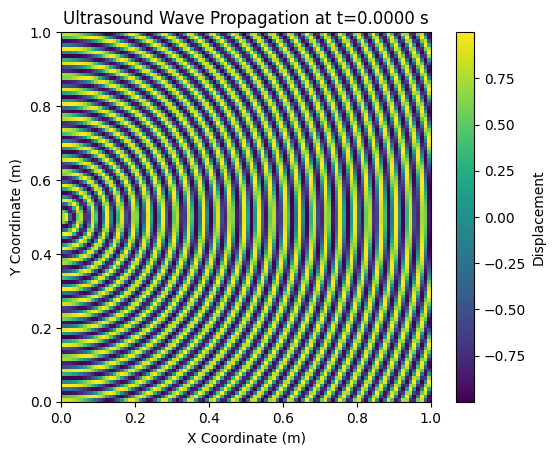

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

TWO_PI = 2 * np.pi

# Parameters
Lx = Ly = 1.0            # Length of the medium in x and y directions
T = 0.0001               # Total simulation time
Nx = Ny = 100            # Number of spatial points in x and y directions
Nt = 25                  # Number of time steps
c = 1500.0               # Speed of sound in the medium (m/s)
f = 40000.0              # Ultrasound frequency (Hz)
wavelength = c / f       # Wavelength
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dt = T / Nt

# Grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Initial conditions
source_x, source_y = 0.0, 0.5  # left side of the grid
u = np.zeros((Nt, Nx, Ny))  # Arrays to store the wave at different time steps
u[0, :, :] = np.sin(TWO_PI * f * np.sqrt((X - source_x)**2 + (Y - source_y)**2) / c)

# Update wave function
def update_wave(u):
    for n in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                u[n+1, i, j] = (2 * u[n, i, j] - u[n-1, i, j] +
                                (c * dt / dx)**2 * (u[n, i+1, j] - 2 * u[n, i, j] + u[n, i-1, j]) +
                                (c * dt / dy)**2 * (u[n, i, j+1] - 2 * u[n, i, j] + u[n, i, j-1]))
    return u

u = update_wave(u)

# Animation function
def animate(n):
    img.set_array(u[n, :, :])
    title.set_text(f'Ultrasound Wave Propagation at t={n * dt:.4f} s')

# Set up the figure
fig, ax = plt.subplots()
img = ax.imshow(u[0, :, :], cmap='viridis', extent=[0, Lx, 0, Ly], origin='lower')
plt.colorbar(img, label='Displacement')
ax.set_xlabel('X Coordinate (m)')
ax.set_ylabel('Y Coordinate (m)')
title = ax.set_title('Ultrasound Wave Propagation at t=0.0000 s')

# Create animation
ani = FuncAnimation(fig, animate, frames=Nt, interval=100)

# Display the animation
HTML(ani.to_html5_video())


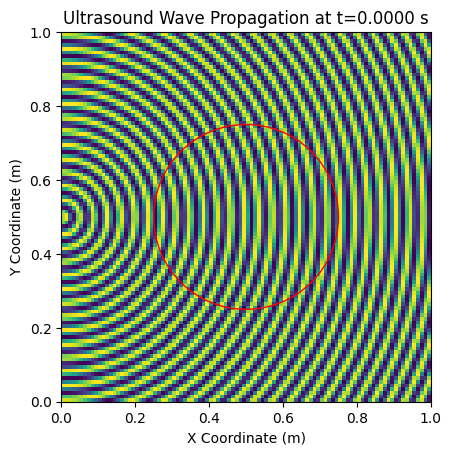

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

TWO_PI = 2 * np.pi

# Parameters
Lx = Ly = 1.0               # Length of the medium in x and y directions
T = 0.0001                  # Total simulation time
Nx = Ny = 100               # Number of spatial points in x and y directions
Nt = 25                     # Number of time steps
c = 1500.0                  # Speed of sound in the medium (m/s)
f = 40000.0                 # Ultrasound frequency (Hz)
wavelength = c / f          # Wavelength
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dt = T / Nt

# Grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Initial conditions
source_x, source_y = 0.0, 0.5  # left side of the grid
u = np.zeros((Nt, Nx, Ny))     # Arrays to store the wave at different time steps
u[0, :, :] = np.sin(TWO_PI * f * np.sqrt((X - source_x)**2 + (Y - source_y)**2) / c)

# Add a cylindrical obstacle
obstacle_radius = 0.25  # 25 cm in meters
obstacle_center_x = source_x + 0.5
obstacle_center_y = source_y

def is_inside_obstacle(x, y, center_x, center_y, radius):
    return (x - center_x)**2 + (y - center_y)**2 <= radius**2

# Mark points inside the obstacle as True
obstacle_mask = is_inside_obstacle(X, Y, obstacle_center_x, obstacle_center_y, obstacle_radius)

# Update wave function with obstacle
def update_wave(u, obstacle_mask):
    for n in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                if not obstacle_mask[i, j]:
                    u[n+1, i, j] = (2 * u[n, i, j] - u[n-1, i, j] +
                                    (c * dt / dx)**2 * (u[n, i+1, j] - 2 * u[n, i, j] + u[n, i-1, j]) +
                                    (c * dt / dy)**2 * (u[n, i, j+1] - 2 * u[n, i, j] + u[n, i, j-1]))
    return u

u = update_wave(u, obstacle_mask)

# Animation function
def animate(n):
    ax.clear()
    ax.imshow(u[n, :, :], cmap='viridis', extent=[0, Lx, 0, Ly], origin='lower')
    # Add obstacle to the plot
    obstacle = plt.Circle((obstacle_center_x, obstacle_center_y), obstacle_radius, color='r', fill=False)
    ax.add_patch(obstacle)
    ax.set_xlabel('X Coordinate (m)')
    ax.set_ylabel('Y Coordinate (m)')
    ax.set_title(f'Ultrasound Wave Propagation at t={n * dt:.4f} s')

# Set up the figure
fig, ax = plt.subplots()

# Create animation
ani = FuncAnimation(fig, animate, frames=Nt, interval=100)

# Display the animation as HTML5 video in Colab
HTML(ani.to_html5_video())



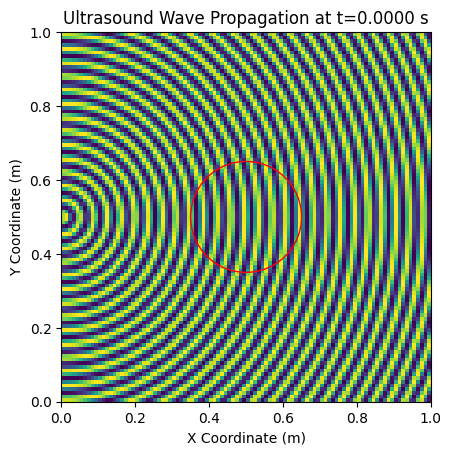

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

TWO_PI = 2 * np.pi

# Parameters
Lx = Ly = 1.0               # Length of the medium in x and y directions
T = 0.0001                  # Total simulation time
Nx = Ny = 100               # Number of spatial points in x and y directions
Nt = 25                     # Number of time steps
c = 1500.0                  # Speed of sound in the medium (m/s)
f = 40000.0                 # Ultrasound frequency (Hz)
wavelength = c / f          # Wavelength
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dt = T / Nt

# Grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Initial conditions
source_x, source_y = 0.0, 0.5  # left side of the grid
u = np.zeros((Nt, Nx, Ny))     # Arrays to store the wave at different time steps
u[0, :, :] = np.sin(TWO_PI * f * np.sqrt((X - source_x)**2 + (Y - source_y)**2) / c)

# Add a spherical obstacle
obstacle_radius = 0.15  # 15 cm in meters
obstacle_center_x = source_x + 0.5
obstacle_center_y = source_y

def is_inside_obstacle(x, y, center_x, center_y, radius):
    return (x - center_x)**2 + (y - center_y)**2 <= radius**2

# Mark points inside the obstacle as True
obstacle_mask = is_inside_obstacle(X, Y, obstacle_center_x, obstacle_center_y, obstacle_radius)

# Update wave function with obstacle
def update_wave(u, obstacle_mask):
    for n in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                if not obstacle_mask[i, j]:
                    u[n+1, i, j] = (2 * u[n, i, j] - u[n-1, i, j] +
                                    (c * dt / dx)**2 * (u[n, i+1, j] - 2 * u[n, i, j] + u[n, i-1, j]) +
                                    (c * dt / dy)**2 * (u[n, i, j+1] - 2 * u[n, i, j] + u[n, i, j-1]))
    return u

u = update_wave(u, obstacle_mask)

# Animation function
def animate(n):
    ax.clear()
    ax.imshow(u[n, :, :], cmap='viridis', extent=[0, Lx, 0, Ly], origin='lower')
    # Add obstacle to the plot
    obstacle = plt.Circle((obstacle_center_x, obstacle_center_y), obstacle_radius, color='r', fill=False)
    ax.add_patch(obstacle)
    ax.set_xlabel('X Coordinate (m)')
    ax.set_ylabel('Y Coordinate (m)')
    ax.set_title(f'Ultrasound Wave Propagation at t={n * dt:.4f} s')

# Set up the figure
fig, ax = plt.subplots()

# Create animation
ani = FuncAnimation(fig, animate, frames=Nt, interval=100)

# Display the animation as HTML5 video in Colab
HTML(ani.to_html5_video())

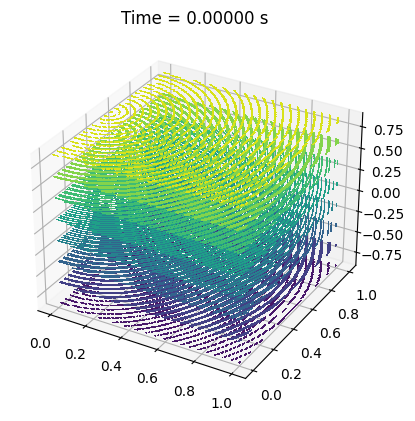

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

TWO_PI = 2 * np.pi

# Parameters
Lx = Ly = Lz = 1.0         # Length of the medium in x, y, and z directions
T = 0.0001                 # Total simulation time
Nx = Ny = Nz = 100         # Number of spatial points in x, y, and z directions
Nt = 25                    # Number of time steps
c = 1500.0                 # Speed of sound in the medium (m/s)
f = 40000.0                # Ultrasound frequency (Hz)
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dz = Lz / (Nz - 1)
dt = T / Nt                # Time step (s)

# Grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Initial conditions
source_position = (0.0 * Lx, 0.5 * Ly, 0.5 * Lz)  # left side of the grid
u = np.zeros((Nt, Nx, Ny, Nz))  # Arrays to store the wave at different time steps
# Calculate distance from the source for each point in the grid
distances = np.sqrt((X - source_position[0])**2 + (Y - source_position[1])**2 + (Z - source_position[2])**2)
# Initialize the wave field based on distance from the source
u[0, :, :, :] = np.sin(TWO_PI * f * distances / c)

# Add a cylindrical obstacle
obstacle_radius = 0.1  # 10 cm in meters
obstacle_length = 0.25  # 25 cm in meters
# Place the cylinder
obstacle_center_x = source_position[0] + 0.5
obstacle_center_y = source_position[1]
# Define the z-limits of the cylinder
obstacle_start_z = source_position[2] - obstacle_length / 2
obstacle_end_z = source_position[2] + obstacle_length / 2

# Define the obstacle mask
obstacle_mask = (X - obstacle_center_x)**2 + (Y - obstacle_center_y)**2 <= obstacle_radius**2
obstacle_mask &= (Z >= obstacle_start_z) & (Z <= obstacle_end_z)

# Update wave function with obstacle
def update_wave(u, obstacle_mask):
    for n in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                for k in range(1, Nz - 1):
                    if not obstacle_mask[i, j, k]:
                        u[n+1, i, j, k] = (2 * u[n, i, j, k] - u[n-1, i, j, k] +
                                           (c * dt / dx)**2 * (u[n, i+1, j, k] - 2 * u[n, i, j, k] + u[n, i-1, j, k]) +
                                           (c * dt / dy)**2 * (u[n, i, j+1, k] - 2 * u[n, i, j, k] + u[n, i, j-1, k]) +
                                           (c * dt / dz)**2 * (u[n, i, j, k+1] - 2 * u[n, i, j, k] + u[n, i, j, k-1]))

# Run the simulation
update_wave(u, obstacle_mask)

# Set up the figure for animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Animation update function
def animate(n):
    ax.clear()
    # Plot the wavefront in the cross-section for each time step
    contour = ax.contourf(X[:, :, int(Nz/2)], Y[:, :, int(Nz/2)], u[n, :, :, int(Nz/2)], cmap='viridis')
    ax.set_title(f'Time = {n*dt:.5f} s')
    return contour

# Create animation
ani = FuncAnimation(fig, animate, frames=Nt, interval=100)

# Display the animation as HTML5 video in Colab
HTML(ani.to_html5_video())

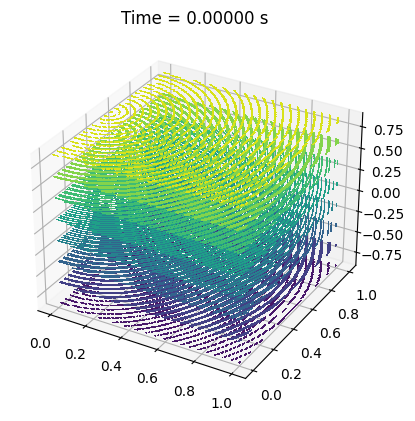

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

TWO_PI = 2 * np.pi

# Parameters
Lx = Ly = Lz = 1.0         # Length of the medium in x, y, and z directions
T = 0.0001                 # Total simulation time
Nx = Ny = Nz = 100         # Number of spatial points in x, y, and z directions
Nt = 25                    # Number of time steps
c = 1500.0                 # Speed of sound in the medium (m/s)
f = 40000.0                # Ultrasound frequency (Hz)
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dz = Lz / (Nz - 1)
dt = T / Nt                # Time step (s)

# Grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Initial conditions
source_position = (0.0 * Lx, 0.5 * Ly, 0.5 * Lz)  # left side of the grid
u = np.zeros((Nt, Nx, Ny, Nz))  # Arrays to store the wave at different time steps
# Calculate distance from the source for each point in the grid
distances = np.sqrt((X - source_position[0])**2 + (Y - source_position[1])**2 + (Z - source_position[2])**2)
# Initialize the wave field based on distance from the source
u[0, :, :, :] = np.sin(TWO_PI * f * distances / c)

# Add a sphere
obstacle_radius = 0.15  # 15 cm in meters
# Place the sphere
obstacle_center_x = source_position[0] + 0.5
obstacle_center_y = source_position[1]
# Define the z-limits of the cylinder
obstacle_start_z = source_position[2] - obstacle_length / 2
obstacle_end_z = source_position[2] + obstacle_length / 2

# Define the obstacle mask
obstacle_mask = (X - obstacle_center_x)**2 + (Y - obstacle_center_y)**2 <= obstacle_radius**2
obstacle_mask &= (Z >= obstacle_start_z) & (Z <= obstacle_end_z)

# Update wave function with obstacle
def update_wave(u, obstacle_mask):
    for n in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                for k in range(1, Nz - 1):
                    if not obstacle_mask[i, j, k]:
                        u[n+1, i, j, k] = (2 * u[n, i, j, k] - u[n-1, i, j, k] +
                                           (c * dt / dx)**2 * (u[n, i+1, j, k] - 2 * u[n, i, j, k] + u[n, i-1, j, k]) +
                                           (c * dt / dy)**2 * (u[n, i, j+1, k] - 2 * u[n, i, j, k] + u[n, i, j-1, k]) +
                                           (c * dt / dz)**2 * (u[n, i, j, k+1] - 2 * u[n, i, j, k] + u[n, i, j, k-1]))

# Run the simulation
update_wave(u, obstacle_mask)

# Set up the figure for animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Animation update function
def animate(n):
    ax.clear()
    # Plot the wavefront in the cross-section for each time step
    contour = ax.contourf(X[:, :, int(Nz/2)], Y[:, :, int(Nz/2)], u[n, :, :, int(Nz/2)], cmap='viridis')
    ax.set_title(f'Time = {n*dt:.5f} s')
    return contour

# Create animation
ani = FuncAnimation(fig, animate, frames=Nt, interval=100)

# Display the animation as HTML5 video in Colab
HTML(ani.to_html5_video())